# ЕГЭ 2017 Вариант 4 &nbsp; &nbsp; &nbsp; EGE 2017 Variant 4
[ЕГЭ-2017. Информатика.10 тренировочных вариантов. Ушаков Д.М.](https://drive.google.com/file/d/0B6696ckkWj_zS2ptblAxNERHZzQ/view)

[Basic Regular Expressions in R Cheatsheet](https://www.rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf)

[DataFlair: R Tutorials](https://data-flair.training/blogs/category/r/)

[Алгоритм Шеннона — Фано](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%B0%D0%BD%D0%BE)

[IPv4 - Address Classes](https://www.tutorialspoint.com/ipv4/ipv4_address_classes.htm)

[Basic and advanced network visualization with R](http://www.kateto.net/wp-content/uploads/2016/04/Sunbelt%202016%20R%20Network%20Visualization%20Handout.pdf)

In [18]:
library(IRdisplay)
library(repr)
library(hash)
library(numbers)
library(e1071)
library(igraph)
library(VennDiagram)
library(PythonInR)

In [17]:
# install.packages("")

In [22]:
answer_dictionary <- hash()

In [23]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Roboto');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: gray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #348ABD; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre, div.output_subarea {color: gray;}
div.input_prompt {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: gray;}                        
</style>")

## Часть 1 &nbsp; &nbsp; &nbsp; Part 1
## 1.
Сколько значащих нулей в двоичной записи числа 188?

How many significant zeros in the binary number are 188?

In [24]:
options(scipen = 999)
dec2bin <- function(n) {
  bv <- rep(0, 1 + floor(log(n, 2)))
  while (n >= 2) {
    pow <- floor(log(n, 2))
    bv[1 + pow] <- 1
    n <- n - 2^pow
  }
  bv[1] <- n %% 2
  paste(rev(bv), collapse = "")
}

In [25]:
dec2bin(188)

[1] "10111100"

In [26]:
gsub("1","",dec2bin(188))

[1] "000"

In [27]:
nchar(gsub("1","",dec2bin(188)))

[1] 3

In [28]:
# 188 _10 = 10111100_2
1 * 2 ** 7 + 1 * 2 ** 5 + 1 * 2 ** 4 + 1 * 2 ** 3 + 1 * 2 ** 2

[1] 188

В составе числа $188_{10}$ 5 ненулевых коэффициентов различных степеней основания системы 2. 

Наибольшая степень - 7-ая, значит всего коэффициентов - 8.

Количество значащих нулей в двоичной записи $188_{10}$ равно 8 - 5 = 3.

---

In the composition of the number $188_{10}$ there are 5 nonzero coefficients of different degrees of the binary basis 2.

The highest degree is the 7th, which means there are 8 coefficients in the binary form of this number.

So the number of significant zeros in the $188_{10}$ binary record is 8 - 5 = 3.

In [29]:
answer_dictionary[1] <- nchar(gsub("1","",dec2bin(188)))

## 2.
Дан фрагмент таблицы истинности выражения F, зависящего от трёх аргументов X, Y, Z.

A fragment of the truth table of the expression F, depending on the three arguments X, Y, Z is given.


| X | Y | Z | F |
|-:|-:|-:|-:|
| 0 | 0 | 0 | 0 |
| 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 1 |

Перечислите в порядке возрастания без запятых и пробелов номера логических выражений, которые соответствуют F.

List in ascending order without commas and spaces the numbers of logical expressions that correspond to F.

$1) \ (X \lor \neg Y) \to Z \\    
2) \ (X \lor Y) \to \neg Z \\
3) \ X \lor (\neg Y \to Z) \\
4) \ X \lor Y \lor Z \\
5) \ X \lor Y \land \neg Z$

In [31]:
bc <- matrix(c(0,0,0, 0,1,1, 1,0,0), nrow=3, ncol=3, byrow = TRUE)
x_implies_y <- function(x,y) {!x | y}

F <- function(X, Y, Z, I) {
    if (I == 1) {return(x_implies_y((X | !Y), Z))}
    if (I == 2) {return(x_implies_y((X | Y), !Z))}
    if (I == 3) {return(X | x_implies_y(!Y, Z))}
    if (I == 4) {return(X | Y | Z)}    
    if (I == 5) {return(X | Y & !Z)}    
} 

In [33]:
for (i in 1:5){
    result = vector(length=3)
    for (j in 1:3) {result[j] = F(bc[j,1],bc[j,2],bc[j,3],i)}
    if (all(result == c(FALSE,TRUE,TRUE))){print(i)}
}

[1] 3
[1] 4


In [34]:
answer_dictionary[2] <- '34'

## 3.
Между четырьмя местными аэропортами `ЛЕСНОЙ`, `ЗИМА`, `КРАЙ` и `ПОЛЯНА`, ежедневно выполняются авиарейсы. 

Приведён фрагмент расписания перелётов между ними. 

Путешественник оказался в аэропорту `ЛЕСНОЙ` в полночь (0:00). 

Определите самое раннее время, когда он может попасть в аэропорт `ПОЛЯНА`.

| Аэропорт вылета | Аэропорт прилёта | Время вылета | Время прилёта |
|-|-|-|-|
| ПОЛЯНА | КРАЙ	| 06:20 | 08:35 |
| КРАЙ | ЛЕСНОЙ | 10:25 | 12:35 |
| ЛЕСНОЙ | КРАЙ	| 11:45	| 13:30 |
| ЗИМА | ПОЛЯНА | 12:15 | 14:25 |
| ПОЛЯНА | ЛЕСНОЙ | 12:45 | 16:35 |
| КРАЙ | ПОЛЯНА | 13:15 | 15:40 |
| ЛЕСНОЙ | ПОЛЯНА | 13:40 | 17:25 |
| ЛЕСНОЙ | ЗИМА | 15:30 | 17:15 |
| ПОЛЯНА | ЗИМА | 17:35 | 19:30 |
| ЗИМА | ЛЕСНОЙ | 19:40 | 21:55 |

Between the four local airports of `ЛЕСНОЙ`, `ЗИМА`, `КРАЙ` and `ПОЛЯНА`, daily flights are carried out. 

A fragment of the flight schedule between them is given. 

The traveler was at the airport `ЛЕСНОЙ` at midnight (0:00). 

Determine the earliest time when he can arrive to the airport `ПОЛЯНА`.

In [59]:
time_out <- c('06:20', '10:25', '11:45', '12:15', '12:45',
              '13:15', '13:40', '15:30', '17:35', '19:40')

time_in <- c('08:35', '12:35', '13:30', '14:25', '16:35',
             '15:40', '17:25', '17:15', '19:30', '21:55')

schedule <- data.frame(
    'Аэропорт вылета' = c('ПОЛЯНА', 'КРАЙ', 'ЛЕСНОЙ', 'ЗИМА', 'ПОЛЯНА',
                        'КРАЙ', 'ЛЕСНОЙ', 'ЛЕСНОЙ', 'ПОЛЯНА', 'ЗИМА'), 
    'Аэропорт прилета' = c('КРАЙ', 'ЛЕСНОЙ', 'КРАЙ', 'ПОЛЯНА', 'ЛЕСНОЙ',
                        'ПОЛЯНА', 'ПОЛЯНА', 'ЗИМА', 'ЗИМА', 'ЛЕСНОЙ'), 
    'Время вылета' = format(strptime(time_out, format='%H:%M'), '%H:%M'),
    'Время прилета' = format(strptime(time_in, format='%H:%M'), '%H:%M'))

schedule

Аэропорт.вылета,Аэропорт.прилета,Время.вылета,Время.прилета
ПОЛЯНА,КРАЙ,06:20,08:35
КРАЙ,ЛЕСНОЙ,10:25,12:35
ЛЕСНОЙ,КРАЙ,11:45,13:30
ЗИМА,ПОЛЯНА,12:15,14:25
ПОЛЯНА,ЛЕСНОЙ,12:45,16:35
КРАЙ,ПОЛЯНА,13:15,15:40
ЛЕСНОЙ,ПОЛЯНА,13:40,17:25
ЛЕСНОЙ,ЗИМА,15:30,17:15
ПОЛЯНА,ЗИМА,17:35,19:30
ЗИМА,ЛЕСНОЙ,19:40,21:55


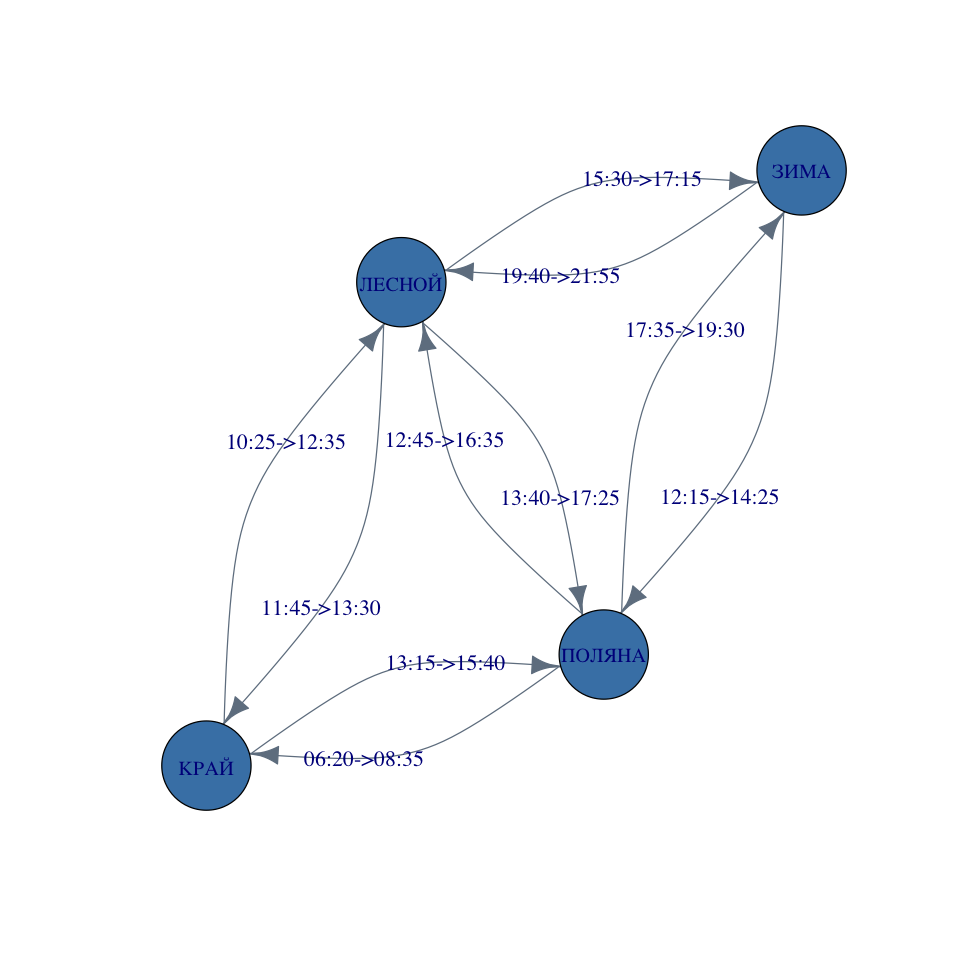

In [102]:
options(warn = -1,repr.plot.width=8,repr.plot.height=8)
edges <- data.frame(from=schedule[1],to=schedule[2])
t <- c(length=10)
for (i in 1:10) {
    t[i] <- paste(time_out[i],time_in[i],sep='->')
}

g <- graph_from_data_frame(edges, directed=TRUE)
plot(g,
     vertex.color="steelblue",vertex.size=30,
     edge.color="slategray",edge.label=t,
     edge.curved=0.4,edge.label.cex=1.1)

In [103]:
paths <- all_simple_paths(g,'ЛЕСНОЙ','ПОЛЯНА')
paths <- lapply(1:length(paths), function(x) as_ids(paths[[x]]))
paths

[[1]]
[1] "ЛЕСНОЙ" "ПОЛЯНА"

[[2]]
[1] "ЛЕСНОЙ" "КРАЙ"   "ПОЛЯНА"

[[3]]
[1] "ЛЕСНОЙ" "ЗИМА"   "ПОЛЯНА"

In [104]:
answer_dictionary[3] <-'17:25'

## 4.
Для групповых операций с файлами используются маски имён файлов. 

Маска представляет собой последовательность букв, цифр и прочих допустимых в именах файлов символов, в которой также могут встречаться следующие символы.

Символ `«?»` (вопросительный знак) означает ровно один произвольный символ.

Символ `«*»` (звёздочка) означает любую последовательность символов произвольной длины, в том числе `«*»` может задавать и пустую последовательность.

В каталоге находятся пять файлов:

`boom.pas`, `bloom.ppt`, `loom.pas`, `bottom.pdf`, `bom.pps`.

Ниже представлено восемь масок. 

`b*om.???`, `bo*.??*`, `*oo*m.*p??`, `?o*m.p?s`, `?oo*m.p*`, `*lo*.p*`, `*om.*`, `b*o*m.??*`


Сколько из них таких, которым соответствует ровно три файла из данного каталога?

---

For group operations with files, file name masks are used. 

A mask is a sequence of letters, numbers and other permissible characters in file names, in which the following symbols can also occur.

The symbol `"?"` (question mark) means exactly one arbitrary character.

The symbol `"*"` (asterisk) means any sequence of characters of arbitrary length, including the case when `"*"` can specify an empty sequence.

There are five files in the directory:

`boom.pas`, `bloom.ppt`, `loom.pas`, `bottom.pdf`, `bom.pps`.

Here are eight masks. 

`b*om.???`, `bo*.??*`, `*oo*m.*p??`, `?o*m.p?s`, `?oo*m.p*`, `*lo*.p*`, `*om.*`, `b*o*m.??*`

How many of them are those to which exactly three files from this catalog correspond?

In [107]:
file_list <- c('boom.pas', 'bloom.ppt', 'loom.pas', 
               'bottom.pdf', 'bom.pps')
mask_list <- c('b*om.???', 'bo*.??*', '*oo*m.*p??', '?o*m.p?s',
               '?oo*m.p*', '*lo*.p*', '*om.*', 'b*o*m.??*')

df <- data.frame(file_list=file_list,
                 mask_1=grepl("^b.*om\\....$", file_list), 
                 mask_2=grepl("^bo.*\\....*$", file_list), 
                 mask_3=grepl("^.*oo.*m\\..*p..$", file_list), 
                 mask_4=grepl("^.o.*m\\.p.s$", file_list),
                 mask_5=grepl("^.oo.*m\\.p.*$", file_list), 
                 mask_6=grepl("^.*lo.*\\.p.*$", file_list), 
                 mask_7=grepl("^.*om\\..*$", file_list), 
                 mask_8=grepl("^b.*o.*m\\....*$", file_list))
df 

file_list,mask_1,mask_2,mask_3,mask_4,mask_5,mask_6,mask_7,mask_8
boom.pas,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
bloom.ppt,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
loom.pas,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
bottom.pdf,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
bom.pps,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE


In [109]:
c <- 0
for (i in 2:9) {
    print(mask_list[i-1]); 
    print(length(df[1:5,i][df[1:5,i]==TRUE]))
    if (length(df[1:5,i][df[1:5,i]==TRUE]) == 3) {c <- c + 1}
}

c

[1] "b*om.???"
[1] 4
[1] "bo*.??*"
[1] 3
[1] "*oo*m.*p??"
[1] 3
[1] "?o*m.p?s"
[1] 3
[1] "?oo*m.p*"
[1] 2
[1] "*lo*.p*"
[1] 2
[1] "*om.*"
[1] 5
[1] "b*o*m.??*"
[1] 4


[1] 3

In [110]:
answer_dictionary[4] <- toString(c)

## 5.
Для кодирования некоторой последовательности, состоящей из букв А, Б, В, Г и Д, используется неравномерный двоичный код, 

позволяющий однозначно декодировать полученную двоичную последовательность. 

Вот этот код: `А-110`, `Б-0`, `В-111`, `Г-100`. 

Каким кодовым словом должна кодироваться буква Д? 

Если таких вариантов несколько, укажите самый короткий.

---

To encode a sequence consisting of the letters А, Б, В, Г and Д, an unequal binary code is used, 

which uniquely decodes the resulting binary sequence.

Here is the code: `А-110`, `Б-0`, `В-111`, `Г-100`.

What code word should be used for encoding the letter Д? 

If there are several such variants, specify the shortest one.

В решении использован Алгоритм Шеннона — Фано.

1) Самые короткие коды 0 и 1 не могут быть использованы: 0 уже является одним из кодовых слов, с 1 начинаются другие слова.

2) Следующая бинарная комбинация - из двух цифр. 

В начале кодовых слов уже есть сочетания 10 и 11. 

Сочетания 00 и 01 использовать нельзя: уже существует код, равный 0, и он не должен встречаться в начале других кодовых слов.

3) Трехзначные сочетания могут начинаться только с 1 и среди них уже есть 100, 110, 111. 

Остается только один вариант самого короткого кодирования: `Д - 101`.

---

The solution uses the Shannon-Fano Algorithm.

1) The shortest codes 0 and 1 can not be used: 0 is already one of the code words, with 1 other words begin.

2) The next binary combination is two-digit. 

At the beginning of the code words, there are already used combinations of 10 and 11. 

The combinations 00 and 01 cannot be used: there is one code equal to 0, and it should not occur at the beginning of other codewords.

3) Three-digit combinations can start only with 1 and there are already used 100, 110, 111 among them. 

The remaining variant for the shortest coding is only one: `Д - 101`.

In [112]:
answer_dictionary[5] <- '101'

## 6.
В некоторой информационной системе информация кодируется двоичными шестиразрядными словами. При передаче данных возможны их искажения, поэтому в конец каждого слова добавляется седьмой (контрольный) разряд таким образом, чтобы сумма разрядов нового слова, считая контрольный, была чётной. Например, к слову `101101` справа будет добавлен `0`, а к слову `010110` — `1`.

После приёма слова производится его обработка. При этом проверяется сумма его разрядов, включая контрольный. Если она нечётна, это означает, что при передаче этого слова произошёл сбой, и оно автоматически заменяется на зарезервированное слово `0000000`. Если она чётна, это означает, что сбоя не было или сбоёв было больше одного. В этом случае принятое слово не изменяется.

Приведём фрагмент кодовой таблицы, используемый в данной задаче:

---

In some information system, information is encoded in binary six-digit words. When transmitting data, their distortions are possible, so at the end of each word the seventh (control) symbol is added so that the sum of the bits of the new word, assuming the control digit, becomes even. For example, to the word `101101` on the right will be added `0`, and to the word `010110` - `1`.

After receiving the word, it is processed. This program checks the sum of code digits, including the control ones. If it is odd, it means that when this word was transmitted, it crashed and it is automatically replaced with the reserved word `0000000`. If it is even, it means that there was no malfunction or there were more than one malfunction. In this case, the received word does not change.

Here is the fragment of the code table used in this task:

| Буква | Кодовое слово | Примечание |
|-:|-:|-:|
| Letter | Code Word | Note |
| x | `000000` | сбой \ malfunction |
| A | `100001` | - |
| B | `011010` | - |
| C | `110010` | - |
| D | `110011` | - |

Исходное сообщение АВС было передано в виде:

`1000010 0110101 1100101`.

И затем было принято в виде:

`1100110 0110101 1100100`.

Как будет выглядеть принятое сообщение после обработки? 

В ответе запишите последовательность букв без пробелов и знаков препинания.

---

The original ABC message was sent as:

`1000010 0110101 1100101`

And then it was taken in the form:

`1100110 0110101 1100100`.

How will the received message look after processing? 

In the answer, write down a sequence of letters without spaces or punctuation.

In [120]:
string <- unlist(strsplit('1100110 0110101 1100100','[ ]'))
codes <- c('100001', '011010', '110010', '110011')
symbols <- c('A', 'B', 'C', 'D')
result <- ''

for (el in string) {
    if (nchar(gsub("0","",el)) %% 2 == 1) {
        result = paste(result,'x',sep='')
    } else {
        for (i in 1:4){
            if (substr(el,1,6) == codes[i]) {
                result = paste(result,symbols[i],sep='')
            }
        }
    }
}

result

[1] "DBx"

In [121]:
answer_dictionary[6] <- result

## 7.

## 8.

## 9.

## 10.

## 11.

## 12.

## 13.

## 14.

## 15.

## 16.

## 17.

## 18.

## 19.

## 20.

## 21.

## 22.

## 23.

## Часть 2 &nbsp; &nbsp; &nbsp;​ Part 2
## 24.

## 25.

## 26.

## 27.

## Ответы &nbsp; &nbsp; &nbsp; Answers

In [122]:
answer_dictionary

<hash> containing 6 key-value pair(s).
  1 : 3
  2 : 34
  3 : 17:25
  4 : 3
  5 : 101
  6 : DBx